In [149]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import glob  as glob
import pandas as pd
from scipy.fft import fft, fftfreq


In [154]:
figuras = glob.glob('../figs/2021-10-15_15_33_11/png/*.png')
figuras.sort()


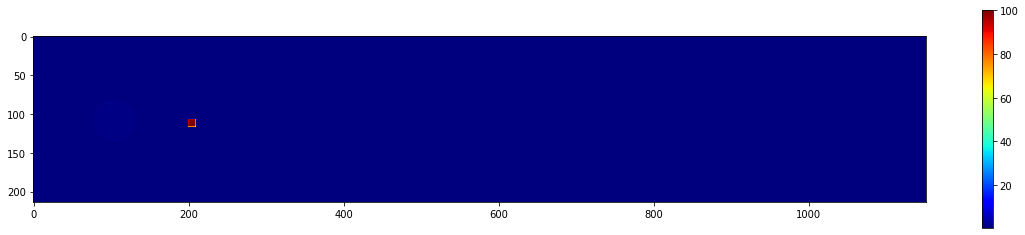

In [158]:
figura = '../figs/2021-10-15_15_33_11/png/u_norm_0.png'
img = imread(figura)
img = np.mean(img,-1)

ny, nx = img.shape
i = 200
j = int(ny/2)
img[j:j+10,i:i+10] = 100
fig, ax  = plt.subplots(figsize=(20,4))

figura = ax.imshow(img,cmap='jet')
fig.colorbar(figura)



In [159]:
figuras = glob.glob('../figs/2021-10-15_15_33_11/png/*.png')
figuras.sort()
u_mag = []
for figura in figuras:
    img = imread(figura)
    img = np.mean(img,-1)

    ny, nx = img.shape
    i = 1000;j = int(ny/2)
    u_mag.append(img[j][i])

In [ ]:
len(figuras)

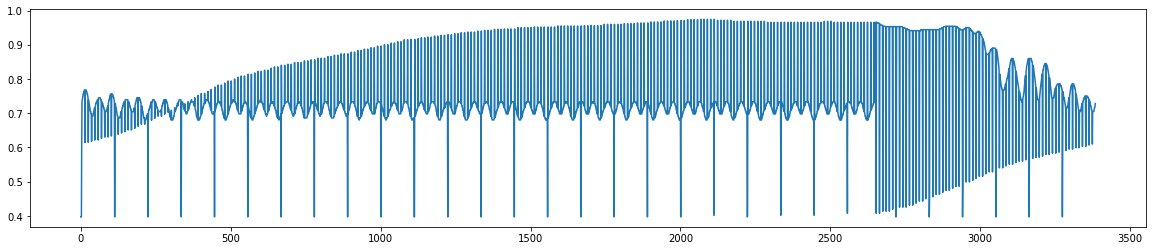

In [160]:
fig, ax  = plt.subplots(figsize=(20,4))
ax.plot(u_mag) 


In [ ]:
to = -400
delay = 44

fig, ax  = plt.subplots(figsize=(20,10))
ax.plot(u_mag[to:],'r.',label='original')  
ax.plot(u_mag[to-delay:],alpha=0.2,label=delay) 
ax.legend()
ax.grid()

In [162]:
nombres = ['t','Cx','Cy','Cxa','Cya','dCx','dCy']
results = pd.read_csv('../figs/2021-10-15_15_33_11/drag_lift',header=None,
                      delim_whitespace=True,index_col=0,names=nombres)
results.head()

,Cx,Cy,Cxa,Cya,dCx,dCy
t,,,,,,
0.000000,1.850372e-13,5.782412e-15,0.0,0.0,0.0,0.0
0.000024,-0.000000e+00,-0.000000e+00,0.0,0.0,0.0,0.0
0.000048,1.850372e-13,1.445603e-14,0.0,0.0,0.0,0.0
0.000072,-0.000000e+00,-1.734723e-14,0.0,0.0,0.0,0.0
0.000096,1.850372e-13,7.228014e-15,0.0,0.0,0.0,0.0


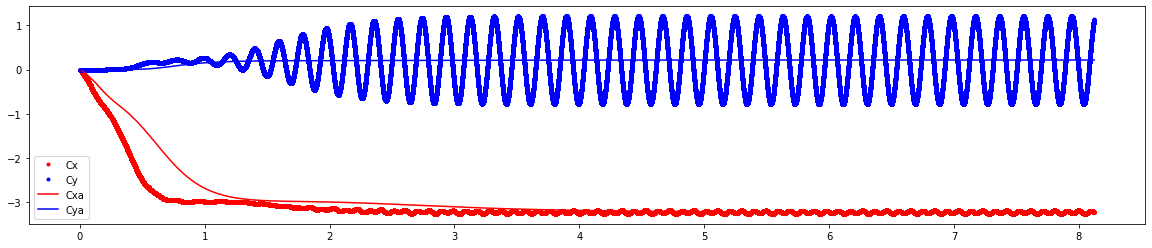

In [163]:
fig, ax  = plt.subplots(figsize=(20,4))
ax.plot(results.Cx,'r.',label='Cx')
ax.plot(results.Cy,'b.',label='Cy')
ax.plot(results.Cxa,'r-',label='Cxa')
ax.plot(results.Cya,'b-',label='Cya')
ax.legend()

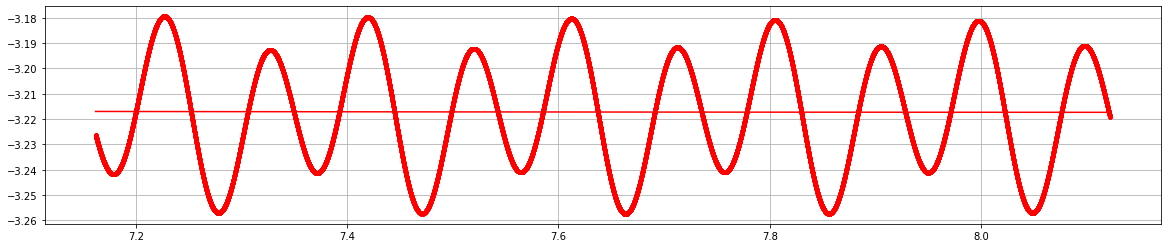

In [164]:
r = results.iloc[-40000:]
fig, ax  = plt.subplots(figsize=(20,4))
ax.plot(r.Cx,'r.',label='Cx')
ax.plot(r.Cxa,'r-',label='Cxa')

ax.grid()


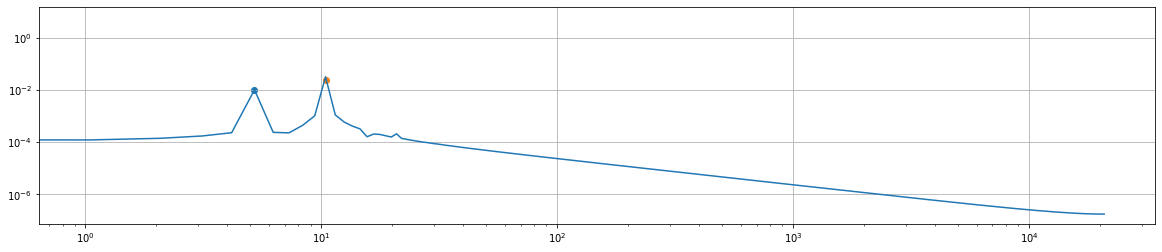

In [216]:
T = 0.000024
N = len(r.Cx)
yf = fft(np.array(r.Cx))
xf = fftfreq(N, T)[:N//2]
fig, ax  = plt.subplots(figsize=(20,4))

ax.loglog(xf, 2.0/N * np.abs(yf[0:N//2]))
ax.scatter(5.2e0,1e-2)
ax.scatter(1.05e1,2.4e-2)
# ax.set_xlim(10e-10,10e-8)
ax.grid()


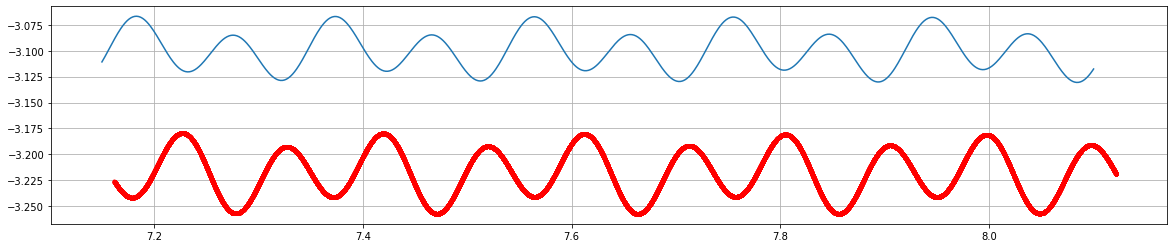

In [252]:
r = results.iloc[-40000:]
fig, ax  = plt.subplots(figsize=(20,4))

ax.plot(r.Cx,'r.',label='Cx')

phi = 1
x = np.linspace(7.15,8.1,1000)
y = 0.01*np.sin(5.2e0 * 2.0*np.pi*x - phi) + 2.4e-2*np.sin(1.05e1 * 2.0*np.pi*x -phi)-3.1

ax.plot(x,y)
ax.grid()


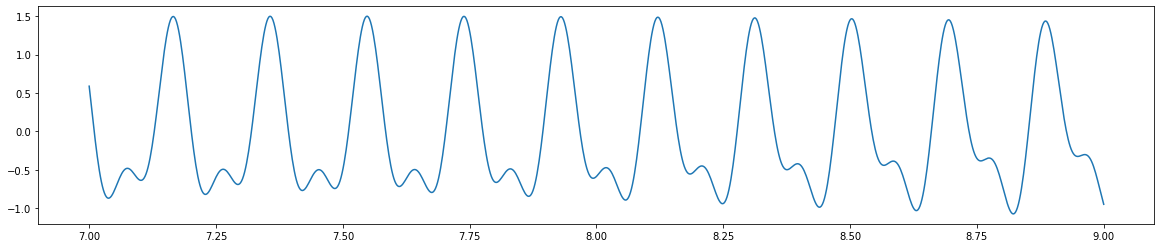

In [202]:
x = np.linspace(7,9,1000)
y = np.sin(5.2e0 * 2.0*np.pi*x) + 0.5*np.sin(1.05e1 * 2.0*np.pi*x)

fig, ax  = plt.subplots(figsize=(20,4))
ax.plot(x,y)

In [ ]:
N

In [ ]:
fig, ax  = plt.subplots(figsize=(20,4))

figura =  ax.specgram(results.Cy, NFFT=121, Fs=1/0.000024, noverlap=120,cmap='jet')
fig.colorbar(figura)
ax.show()

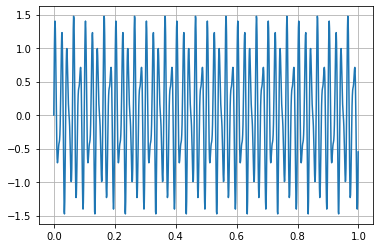

In [174]:
N = 1000
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(x,y)
plt.grid()
plt.show()

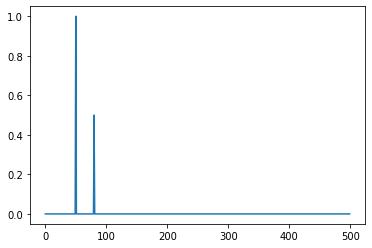

In [175]:

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))